# Part - 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Load

In [18]:
data = pd.read_excel("Dxb_Data_Cleaned.xlsx")

In [19]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   trans_group_id       1048575 non-null  int64  
 1   trans_group_en       1048575 non-null  object 
 2   procedure_name_en    1048575 non-null  object 
 3   instance_date        1048573 non-null  object 
 4   property_type_en     1048575 non-null  object 
 5   property_usage_en    1048575 non-null  object 
 6   reg_type_en          1048575 non-null  object 
 7   area_name_en         1048575 non-null  object 
 8   nearest_landmark_en  865685 non-null   object 
 9   nearest_metro_en     754709 non-null   object 
 10  nearest_mall_en      749288 non-null   object 
 11  procedure_area       1048575 non-null  float64
 12  actual_worth         1048575 non-null  int64  
 13  meter_sale_price     1048575 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 

### Data Cleaning Section

In [21]:
data['instance_date'] = pd.to_datetime(data['instance_date'], errors='coerce')

In [22]:
# Ensure instance_date is datetime
data['instance_date'] = pd.to_datetime(data['instance_date'], errors='coerce')

# Filter only dates between Jan 1, 2015 and Dec 31, 2025
data = data[(data['instance_date'] >= '2015-01-01') & (data['instance_date'] <= '2025-12-31')].sort_values(by='instance_date', ascending=False)

In [23]:
cols_to_drop = data[["nearest_landmark_en", "nearest_metro_en", "nearest_mall_en"]]
data.drop(columns = cols_to_drop, inplace = True)

In [24]:
data.isnull().sum()

trans_group_id       0
trans_group_en       0
procedure_name_en    0
instance_date        0
property_type_en     0
property_usage_en    0
reg_type_en          0
area_name_en         0
procedure_area       0
actual_worth         0
meter_sale_price     0
dtype: int64

In [25]:
data.rename(columns={
    'trans_group_id': 'transaction_id',
    'trans_group_en': 'transaction_type',
    'procedure_name_en': 'procedure_name',
    'instance_date': 'date',
    'property_type_en': 'property_type',
    'property_usage_en': 'usage_type',
    'reg_type_en': 'registration_type',
    'area_name_en': 'area_name',
    'procedure_area': 'area_sq_m',
    'actual_worth': 'transaction_value',
    'meter_sale_price': 'price_per_sqm'
}, inplace=True)

In [26]:
data['price_per_sqft'] = data['price_per_sqm'] / 10.7639

In [27]:
data['price_per_sqft'] = data['price_per_sqft'].round(2)

In [28]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [29]:
data['month'] = data['date'].dt.strftime('%B')

In [30]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 738017 entries, 679916 to 616873
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   transaction_id     738017 non-null  int64         
 1   transaction_type   738017 non-null  object        
 2   procedure_name     738017 non-null  object        
 3   date               738017 non-null  datetime64[ns]
 4   property_type      738017 non-null  object        
 5   usage_type         738017 non-null  object        
 6   registration_type  738017 non-null  object        
 7   area_name          738017 non-null  object        
 8   area_sq_m          738017 non-null  float64       
 9   transaction_value  738017 non-null  int64         
 10  price_per_sqm      738017 non-null  float64       
 11  price_per_sqft     738017 non-null  float64       
 12  year               738017 non-null  int32         
 13  month              738017 non-null  object  

In [31]:
categorical_cols = [
    'transaction_type', 'procedure_name', 'property_type',
    'usage_type', 'registration_type', 'area_name',
    'month'
]

for col in categorical_cols:
    data[col] = data[col].astype('category')

In [32]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 738017 entries, 679916 to 616873
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   transaction_id     738017 non-null  int64         
 1   transaction_type   738017 non-null  category      
 2   procedure_name     738017 non-null  category      
 3   date               738017 non-null  datetime64[ns]
 4   property_type      738017 non-null  category      
 5   usage_type         738017 non-null  category      
 6   registration_type  738017 non-null  category      
 7   area_name          738017 non-null  category      
 8   area_sq_m          738017 non-null  float64       
 9   transaction_value  738017 non-null  int64         
 10  price_per_sqm      738017 non-null  float64       
 11  price_per_sqft     738017 non-null  float64       
 12  year               738017 non-null  int32         
 13  month              738017 non-null  category

In [2]:
#data = pd.read_excel("cleaned uae real estate dataset.xlsx")

In [36]:
df = data.copy()
df.head()

,transaction_id,transaction_type,procedure_name,date,property_type,usage_type,registration_type,area_name,area_sq_m,transaction_value,price_per_sqm,price_per_sqft,year,month
679916,1,Sales,Sell - Pre registration,2025-06-10,Unit,Residential,Off-Plan Properties,Hadaeq Sheikh Mohammed Bin Rashid,167.77,5334259,31795.07,2953.86,2025,June
315534,1,Sales,Sell,2025-06-10,Unit,Residential,Existing Properties,Burj Khalifa,164.79,3750000,22756.24,2114.13,2025,June
406431,1,Sales,Sell - Pre registration,2025-06-10,Unit,Residential,Off-Plan Properties,Jabal Ali First,72.01,1026625,14256.70,1324.49,2025,June
456240,1,Sales,Delayed Sell,2025-06-10,Land,Other,Existing Properties,Al Yelayiss 1,144.01,2491000,17297.41,1606.98,2025,June
885070,2,Mortgages,Delayed Mortgage,2025-06-10,Villa,Residential,Existing Properties,Madinat Al Mataar,272.35,3000000,11015.24,1023.35,2025,June


In [37]:
#df.to_excel('uae cleaned again.xlsx', sheet_name='Sheet1', index=False)

### Data Anlysis and Visualization

1. Price Evolution (2015–2025)

C:\Users\Nafisa Islam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nafisa Islam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


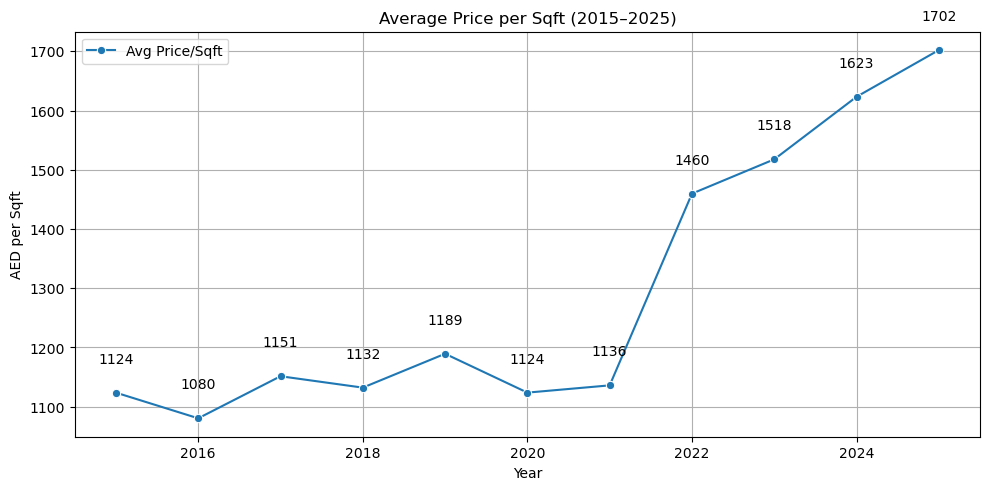

In [38]:
df['year'] = df['year'].astype(int)
price_evolution = df.groupby('year')['price_per_sqft'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=price_evolution, x='year', y='price_per_sqft', marker='o', label='Avg Price/Sqft')
plt.title("Average Price per Sqft (2015–2025)")
plt.xlabel("Year")
plt.ylabel("AED per Sqft")
plt.grid(True)
for i in price_evolution.itertuples():
    plt.text(i.year, i.price_per_sqft + 50, f"{i.price_per_sqft:.0f}", ha='center')
plt.tight_layout()
plt.legend()
plt.savefig('1 Price Evolution', dpi=300)
plt.show()

2. Transaction Volume & Value

In [39]:
volume_value = df.groupby('year').agg(
    transactions=('transaction_id', 'count'),
    value=('transaction_value', 'sum')
).reset_index()
volume_value['value_aed_billions'] = (volume_value['value'])  / 1_000_000_000
volume_value

,year,transactions,value,value_aed_billions
0,2015,41655,183135126781,183.135127
1,2016,41976,196181524983,196.181525
2,2017,45997,192102419122,192.102419
3,2018,35798,155340639323,155.340639
4,2019,37905,153619526380,153.619526
5,2020,35016,118888710818,118.888711
6,2021,58816,209309346006,209.309346
7,2022,85667,354907447244,354.907447
8,2023,117645,459292033892,459.292034
9,2024,160319,547775404145,547.775404


In [40]:
# Filter data for each time range
vv_2015_2020 = volume_value[volume_value['year'].between(2015, 2020)]
vv_2020_2025 = volume_value[volume_value['year'].between(2020, 2025)]

C:\Users\Nafisa Islam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nafisa Islam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nafisa Islam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nafisa Islam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

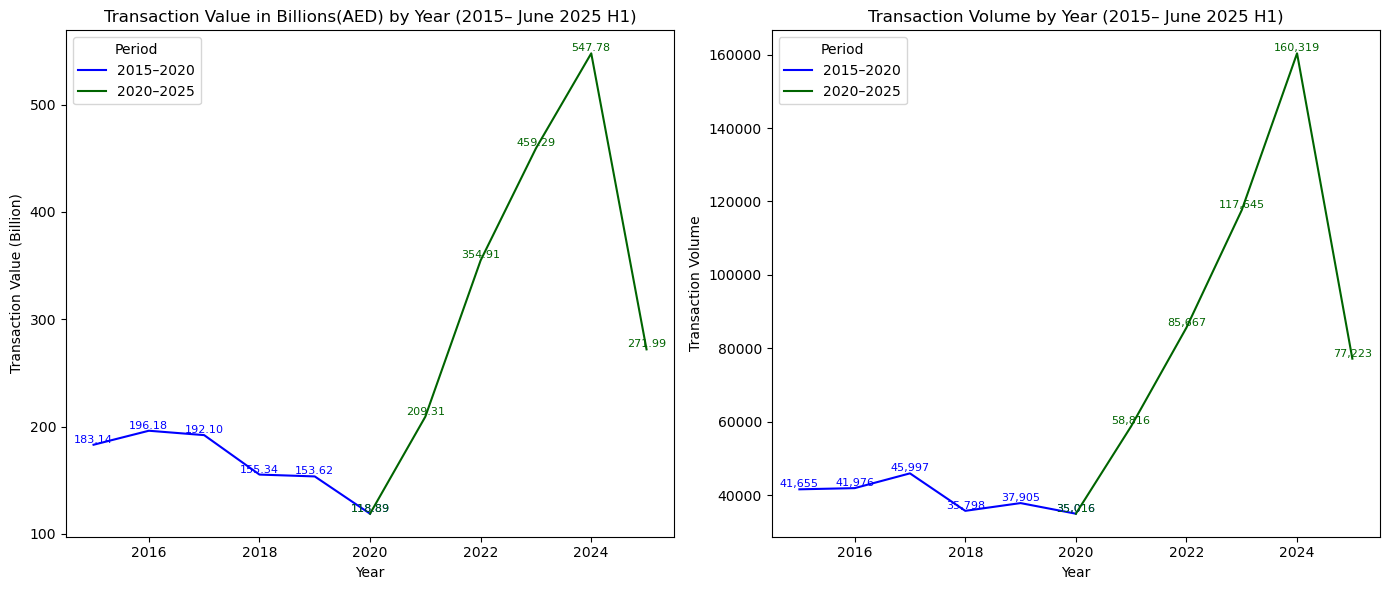

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data=vv_2015_2020, x='year', y='value_aed_billions', label='2015–2020', color='blue', ax=axes[0])
sns.lineplot(data=vv_2020_2025, x='year', y='value_aed_billions', label='2020–2025', color='darkgreen', ax=axes[0])
axes[0].set_title("Transaction Value in Billions(AED) by Year (2015– June 2025 H1)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Transaction Value (Billion)")

# Annotation
for p, color in zip([vv_2015_2020, vv_2020_2025], ['blue', 'darkgreen']):
    for x, y in zip(p['year'], p['value_aed_billions']):
        axes[0].text(x, y, f"{y:.2f}", color=color, fontsize=8, ha='center', va='bottom')


sns.lineplot(data=vv_2015_2020, x='year', y='transactions', label='2015–2020', color='blue', ax=axes[1])
sns.lineplot(data=vv_2020_2025, x='year', y='transactions', label='2020–2025', color='darkgreen', ax=axes[1])
axes[1].set_title("Transaction Volume by Year (2015– June 2025 H1)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Transaction Volume")

# Annotation
for dataset, color in zip([vv_2015_2020, vv_2020_2025], ['blue', 'darkgreen']):
    for x, y in zip(dataset['year'], dataset['transactions']):
        axes[1].text(x, y, f"{y:,}", color=color, fontsize=8, ha='center', va='bottom')

axes[0].legend(title="Period")
axes[1].legend(title="Period")

plt.tight_layout()
#plt.savefig('2 Transaction Volume & Value', dpi=300)
plt.show()

3. Property Type Split

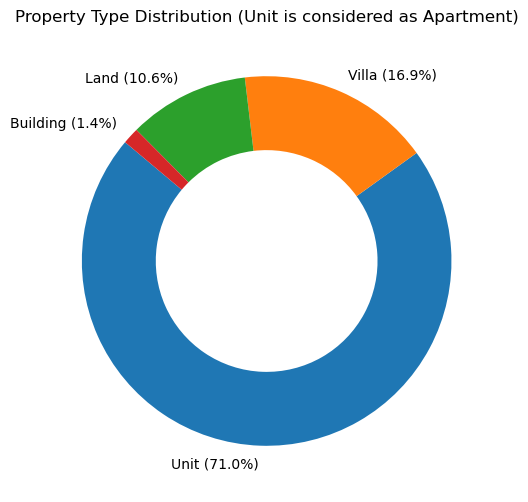

In [42]:
type_split = df['property_type'].value_counts(normalize=True).mul(100).round(2)

plt.figure(figsize=(6, 6))
plt.pie(type_split, labels=[f"{x} ({y:.1f}%)" for x, y in type_split.items()],
        autopct='', startangle=140, wedgeprops=dict(width=0.4))
plt.title("Property Type Distribution (Unit is considered as Apartment)")
#plt.savefig('3 Property Type Split', dpi=300)
plt.show()

 4. Villa vs Unit Price Growth

In [43]:
pivot = df[df['property_type'].isin(['Villa', 'Unit'])]
pivot['property_type'] = pivot['property_type'].cat.remove_unused_categories()
growth = pivot.groupby(['year', 'property_type'])['price_per_sqft'].mean().reset_index()
growth_2015 = growth[growth['year'] == 2015].set_index('property_type')
growth_2025 = growth[growth['year'] == 2025].set_index('property_type')

price_growth = ((growth_2025['price_per_sqft'] - growth_2015['price_per_sqft']) / growth_2015['price_per_sqft'] * 100).round(2)
print(price_growth)

property_type
Unit     46.31
Villa    81.99
Name: price_per_sqft, dtype: float64


C:\Users\Nafisa Islam\AppData\Local\Temp\ipykernel_10940\2666086288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot['property_type'] = pivot['property_type'].cat.remove_unused_categories()
C:\Users\Nafisa Islam\AppData\Local\Temp\ipykernel_10940\2666086288.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  growth = pivot.groupby(['year', 'property_type'])['price_per_sqft'].mean().reset_index()


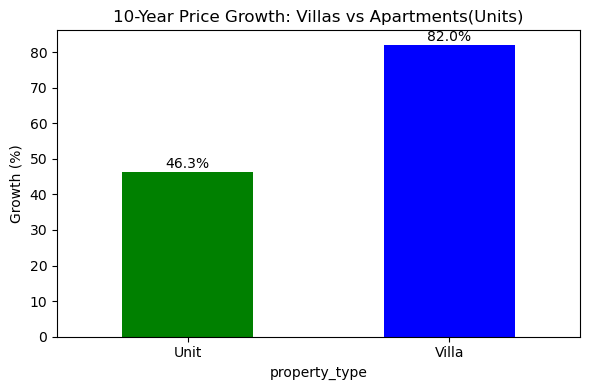

In [79]:
price_growth.plot(kind='bar', color=['green', 'blue'], figsize=(6, 4))
plt.title("10-Year Price Growth: Villas vs Apartments(Units)")
plt.ylabel("Growth (%)")
plt.xticks(rotation=0)
for i, v in enumerate(price_growth):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.tight_layout()
#plt.savefig('4 Villa vs Unit Price Growth', dpi=300)
plt.show()

C:\Users\Nafisa Islam\AppData\Local\Temp\ipykernel_10940\238723730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot['property_type'] = pivot['property_type'].replace({'Unit': 'Apartment'})
C:\Users\Nafisa Islam\AppData\Local\Temp\ipykernel_10940\238723730.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_2015_2020 = pivot_2015_2020.groupby('property_type')['price_per_sqft'].mean().round(2)
C:\Users\Nafisa Islam\AppData\Local\Temp\ipykernel_10940\238723730.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to

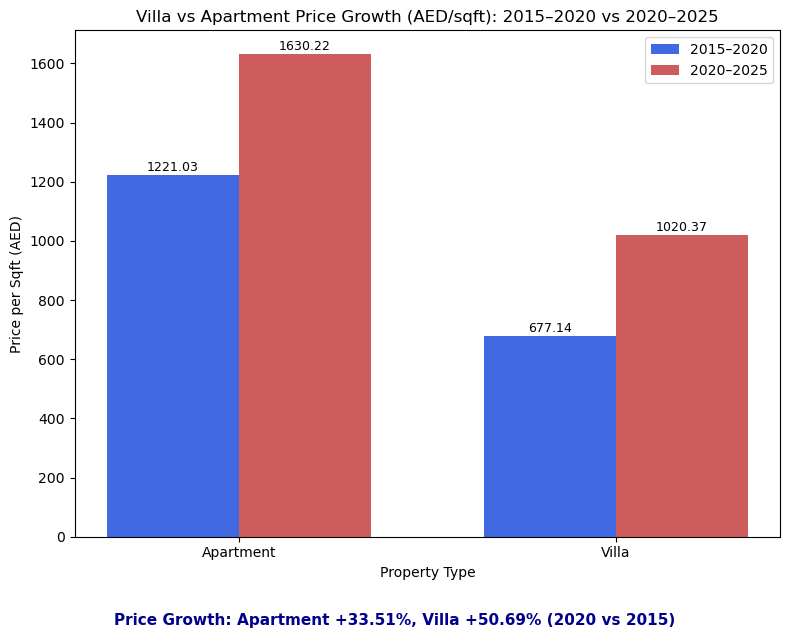

In [78]:
pivot['property_type'] = pivot['property_type'].replace({'Unit': 'Apartment'})

# Filtering for relevant properties
filtered = pivot[pivot['property_type'].isin(['Apartment', 'Villa'])]

pivot_2015_2020 = filtered[(filtered['year'] >= 2015) & (filtered['year'] <= 2020)]
pivot_2020_2025 = filtered[(filtered['year'] > 2020) & (filtered['year'] <= 2025)]

# Calculating averages
avg_2015_2020 = pivot_2015_2020.groupby('property_type')['price_per_sqft'].mean().round(2)
avg_2020_2025 = pivot_2020_2025.groupby('property_type')['price_per_sqft'].mean().round(2)

# Preparing data
labels = ['Apartment', 'Villa']
values_2015_2020 = [avg_2015_2020.get('Apartment', 0), avg_2015_2020.get('Villa', 0)]
values_2020_2025 = [avg_2020_2025.get('Apartment', 0), avg_2020_2025.get('Villa', 0)]

# Computing growth %
growth_apartment = ((values_2020_2025[0] - values_2015_2020[0]) / values_2015_2020[0]) * 100
growth_villa = ((values_2020_2025[1] - values_2015_2020[1]) / values_2015_2020[1]) * 100

# Plotting
x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar([i - width/2 for i in x], values_2015_2020, width=width, label='2015–2020', color='royalblue')
bars2 = ax.bar([i + width/2 for i in x], values_2020_2025, width=width, label='2020–2025', color='indianred')

# Adding labels on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

ax.set_xlabel('Property Type')
ax.set_ylabel('Price per Sqft (AED)')
ax.set_title('Villa vs Apartment Price Growth (AED/sqft): 2015–2020 vs 2020–2025')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding growth summary below chart
summary = (f"Price Growth: Apartment +{growth_apartment:.2f}%, "
           f"Villa +{growth_villa:.2f}% (2020 vs 2015)")
plt.figtext(0.5, -0.05, summary, wrap=True, ha='center', fontsize=11, color='darkblue', fontweight='bold')

plt.tight_layout()
#plt.savefig("villa_vs_apartment_growth_chart.png", dpi=300)
plt.show()

5. Top Areas by Value & Count (2015_2020 vs 2020–2025)

In [87]:
top_areas_2015_2020 = (
    df[df['year'].between(2015, 2020)]
    .groupby('area_name')['transaction_id']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={'transaction_id': 'count_2015_2020'})
).head(5)
top_areas_2015_2020

C:\Users\Nafisa Islam\AppData\Local\Temp\ipykernel_10940\881128917.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('area_name')['transaction_id']


,area_name,count_2015_2020
0,Marsa Dubai,18420
1,Burj Khalifa,13953
2,Business Bay,13450
3,Al Thanyah Fifth,12920
4,Al Barsha South Fourth,12338


In [86]:
top_areas_2020_2025 = (
    df[df['year'].between(2020, 2025)]
    .groupby('area_name')['transaction_id']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={'transaction_id': 'count_2020_2025'})
).head(5)
top_areas_2020_2025

C:\Users\Nafisa Islam\AppData\Local\Temp\ipykernel_10940\1295375678.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('area_name')['transaction_id']


,area_name,count_2020_2025
0,Al Barsha South Fourth,43511
1,Marsa Dubai,35992
2,Business Bay,34609
3,Wadi Al Safa 5,24162
4,Burj Khalifa,22803


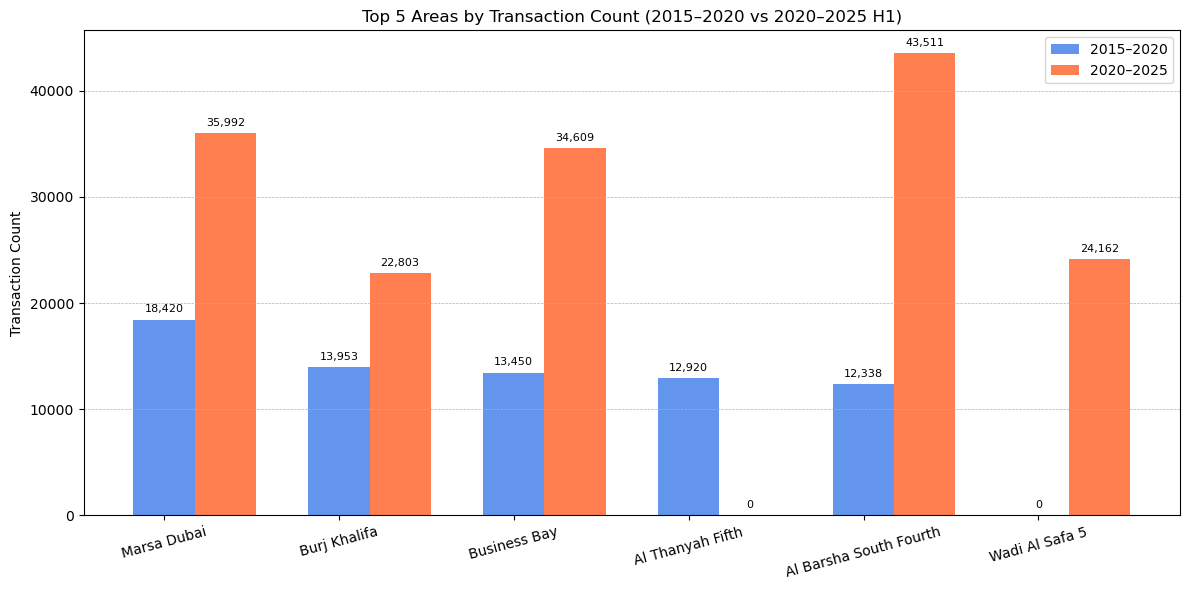

In [91]:
# Merge top areas on area_name
top_areas_2015_2020['area_name'] = top_areas_2015_2020['area_name'].astype(str)
top_areas_2020_2025['area_name'] = top_areas_2020_2025['area_name'].astype(str)

merged_df = pd.merge(top_areas_2015_2020, top_areas_2020_2025, on='area_name', how = 'outer')

# Replacing NaN with 0
merged_df.fillna(0, inplace=True)

# Plotting
x = range(len(merged_df))
width = 0.35

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x, merged_df['count_2015_2020'], width=width, label='2015–2020', color='cornflowerblue')
bars2 = plt.bar([i + width for i in x], merged_df['count_2020_2025'], width=width, label='2020–2025', color='coral')

# Annotations
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f'{int(height):,}', ha='center', va='bottom', fontsize=8)

plt.xticks(ticks=range(len(merged_df)), labels=merged_df['area_name'], rotation=15)
plt.ylabel("Transaction Count")
plt.title("Top 5 Areas by Transaction Count (2015–2020 vs 2020–2025 H1)")
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [96]:
top_values_2015_2020 = (
    df[df['year'].between(2015, 2020)]
    .groupby('area_name')['transaction_value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={'transaction_id': 'value_2015_2020'})
).head(5)
top_values_2015_2020['transaction_value_bill'] = top_values_2015_2020['transaction_value'] / 1_000_000_000
top_values_2015_2020

C:\Users\Nafisa Islam\AppData\Local\Temp\ipykernel_10940\2209442725.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('area_name')['transaction_value']


,area_name,transaction_value,transaction_value_bill
0,Palm Jumeirah,56255661789,56.255662
1,Marsa Dubai,53573233515,53.573234
2,Burj Khalifa,50927562131,50.927562
3,Business Bay,41871312081,41.871312
4,Jabal Ali First,29732151291,29.732151


In [95]:
top_values_2020_2025 = (
    df[df['year'].between(2020, 2025)]
    .groupby('area_name')['transaction_value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={'transaction_id': 'value_2020_2025'})
).head(5)
top_values_2020_2025['transaction_value_bill'] = top_values_2020_2025['transaction_value'] / 1_000_000_000
top_values_2020_2025

C:\Users\Nafisa Islam\AppData\Local\Temp\ipykernel_10940\3604444956.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('area_name')['transaction_value']


,area_name,transaction_value,transaction_value_bill
0,Marsa Dubai,123079541093,123.079541
1,Palm Jumeirah,120616811060,120.616811
2,Business Bay,92199072225,92.199072
3,Burj Khalifa,82417418209,82.417418
4,Wadi Al Safa 3,76792202273,76.792202


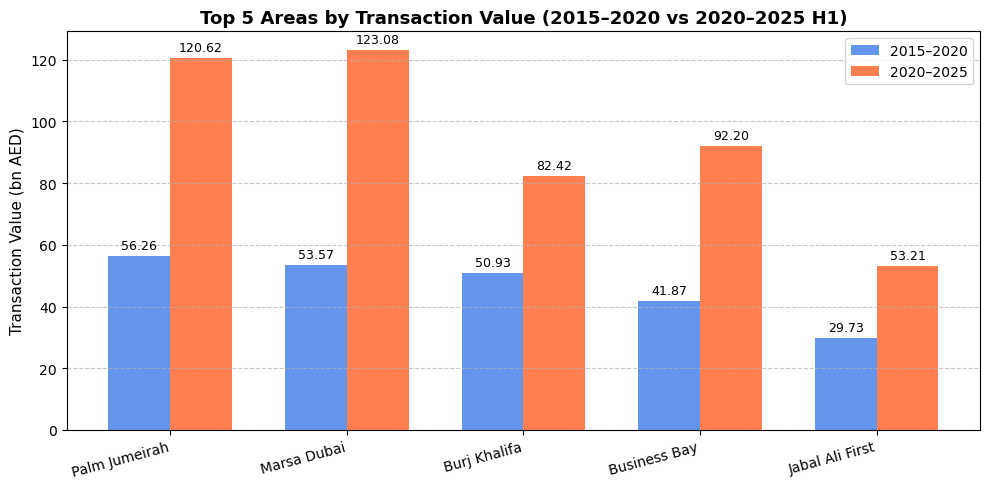

In [97]:
# Merge the data
merged_df = pd.merge(top_values_2015_2020, top_values_2020_2025, on='area_name', suffixes=('_2015_2020', '_2020_2025'))

# Plotting
x = range(len(merged_df))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar([i - width/2 for i in x], merged_df['transaction_value_bill_2015_2020'], width=width, label='2015–2020', color='cornflowerblue')
bars2 = ax.bar([i + width/2 for i in x], merged_df['transaction_value_bill_2020_2025'], width=width, label='2020–2025', color='coral')

# Add annotations
for bar in bars1:
    ax.annotate(f"{bar.get_height():.2f}",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                xytext=(0, 5), textcoords="offset points", ha='center', fontsize=9)

for bar in bars2:
    ax.annotate(f"{bar.get_height():.2f}",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5), textcoords="offset points", ha='center', fontsize=9)

ax.set_title('Top 5 Areas by Transaction Value (2015–2020 vs 2020–2025 H1)', fontsize=13, fontweight='bold')
ax.set_ylabel('Transaction Value (bn AED)', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(merged_df['area_name'], rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

6. Top five after 2020

In [98]:
recent = df[df['year'] >= 2020]
area_stats = recent.groupby('area_name').agg(
    total_value=('transaction_value', 'sum'),
    count=('transaction_id', 'count')
).sort_values(by='total_value', ascending=False).head(5).reset_index()
exchange_rate = 3.67
area_stats['value_usd_billions'] = (area_stats['total_value'] / exchange_rate) / 1_000_000_000
area_stats

C:\Users\Nafisa Islam\AppData\Local\Temp\ipykernel_10940\4132342647.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_stats = recent.groupby('area_name').agg(


,area_name,total_value,count,value_usd_billions
0,Marsa Dubai,123079541093,35992,33.536660
1,Palm Jumeirah,120616811060,11630,32.865616
2,Business Bay,92199072225,34609,25.122363
3,Burj Khalifa,82417418209,22803,22.457062
4,Wadi Al Safa 3,76792202273,7574,20.924306


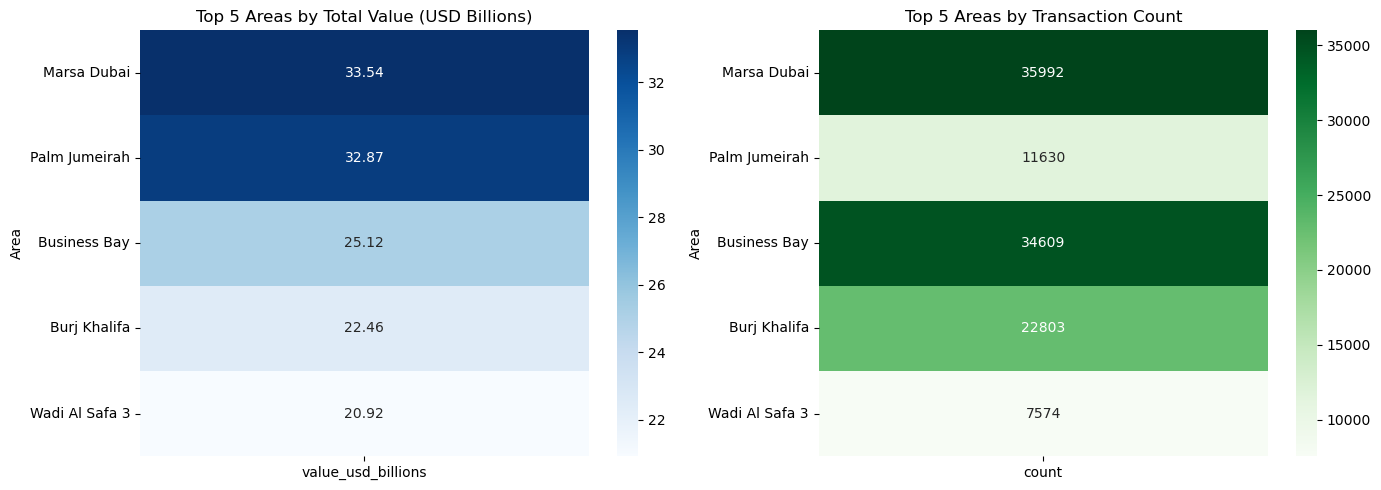

In [99]:
value_data = area_stats[['area_name', 'value_usd_billions']].set_index('area_name')
count_data = area_stats[['area_name', 'count']].set_index('area_name')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(value_data, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title("Top 5 Areas by Total Value (USD Billions)")
#axes[0].set_xlabel("Value (Billions USD)")
axes[0].set_ylabel("Area")

sns.heatmap(count_data, annot=True, fmt=".0f", cmap="Greens", ax=axes[1])
axes[1].set_title("Top 5 Areas by Transaction Count")
axes[1].set_ylabel("Area")

plt.tight_layout()
#plt.savefig('5 Top Areas by Value & Count', dpi=300)
plt.show()

# Part - 2

Data for part 2 was collected by scrapping from the offficial websites and PDF's of the UAE's top developers. 

In [62]:
data_dubai = {
    'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Emaar': [18200, 19500, 21300, 22800, 20100, 15600, 18900, 22100, 25400, 27500],
    'Nakheel': [6800, 7200, 7500, 8100, 7400, 5200, 6800, 7500, 8200, 9000],
    'Damac': [4500, 5100, 5600, 6000, 5200, 3800, 4300, 4900, 5800, 6200],
    'Meraas': [3200, 3800, 4500, 5200, 4800, 3500, 4200, 5000, 5600, 6100],
    'Dubai Properties': [2900, 3300, 3800, 4100, 3700, 2900, 3500, 4200, 4800, 5300]
}
df_dubai = pd.DataFrame(data_dubai)
df_dubai

,Year,Emaar,Nakheel,Damac,Meraas,Dubai Properties
0,2015,18200,6800,4500,3200,2900
1,2016,19500,7200,5100,3800,3300
2,2017,21300,7500,5600,4500,3800
3,2018,22800,8100,6000,5200,4100
4,2019,20100,7400,5200,4800,3700
5,2020,15600,5200,3800,3500,2900
6,2021,18900,6800,4300,4200,3500
7,2022,22100,7500,4900,5000,4200
8,2023,25400,8200,5800,5600,4800
9,2024,27500,9000,6200,6100,5300


In [63]:
data_abudhabi = {
    'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Aldar': [9500, 10200, 11000, 11900, 11300, 9400, 11100, 13000, 14500, 15700],
    'Q Properties': [1300, 1500, 1800, 2100, 2000, 1600, 1900, 2300, 2700, 3100]
}

In [64]:
df_abudhabi = pd.DataFrame(data_abudhabi)
df_abudhabi

,Year,Aldar,Q Properties
0,2015,9500,1300
1,2016,10200,1500
2,2017,11000,1800
3,2018,11900,2100
4,2019,11300,2000
5,2020,9400,1600
6,2021,11100,1900
7,2022,13000,2300
8,2023,14500,2700
9,2024,15700,3100


1. Revenue Timeline (Dubai Developers)

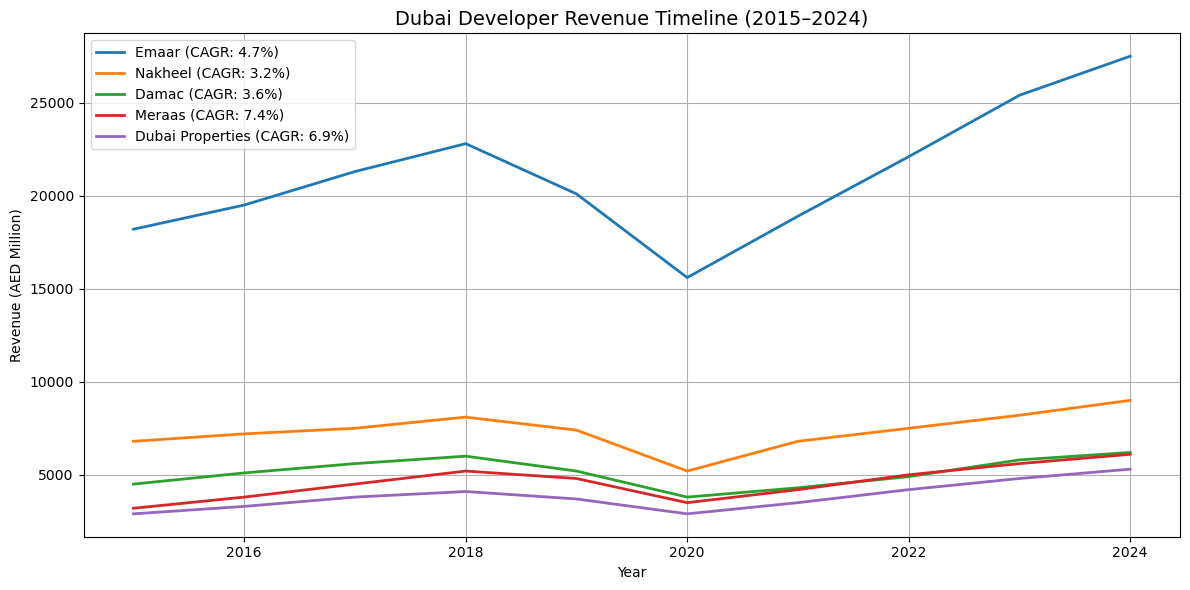

In [65]:
# Calculating CAGR for each developer from 2015 to 2024
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods)) - 1

years = df_dubai['Year'].iloc[-1] - df_dubai['Year'].iloc[0]
cagr_values = {
    dev: calculate_cagr(df_dubai[dev].iloc[0], df_dubai[dev].iloc[-1], years)
    for dev in df_dubai.columns if dev != 'Year'
}

# Plotting revenue
plt.figure(figsize=(12, 6))
for dev in df_dubai.columns[1:]:
    plt.plot(df_dubai['Year'], df_dubai[dev], label=f"{dev} (CAGR: {cagr_values[dev]*100:.1f}%)", linewidth=2)

plt.title('Dubai Developer Revenue Timeline (2015–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Revenue (AED Million)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaying CAGR table
cagr_df = pd.DataFrame({
    'Developer': list(cagr_values.keys()),
    'CAGR (2015–2024)': [f"{val*100:.2f}%" for val in cagr_values.values()]
})

2. Revenue Timeline (Abu Dhabi)

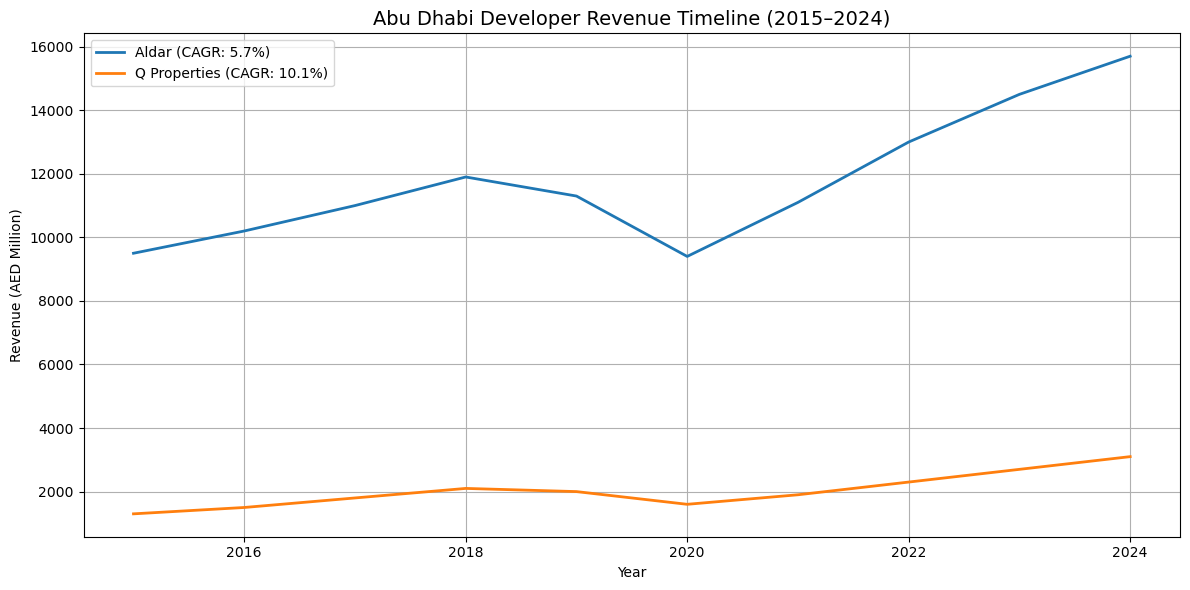

In [66]:
# Calculating CAGR for Abu Dhabi developers
years_auh = df_abudhabi['Year'].iloc[-1] - df_abudhabi['Year'].iloc[0]
cagr_values_auh = {
    dev: calculate_cagr(df_abudhabi[dev].iloc[0], df_abudhabi[dev].iloc[-1], years_auh)
    for dev in df_abudhabi.columns if dev != 'Year'
}

# Plotting revenue
plt.figure(figsize=(12, 6))
for dev in df_abudhabi.columns[1:]:
    plt.plot(df_abudhabi['Year'], df_abudhabi[dev], label=f"{dev} (CAGR: {cagr_values_auh[dev]*100:.1f}%)", linewidth=2)

plt.title('Abu Dhabi Developer Revenue Timeline (2015–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Revenue (AED Million)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaying CAGR table
cagr_df_auh = pd.DataFrame({
    'Developer': list(cagr_values_auh.keys()),
    'CAGR (2015–2024)': [f"{val*100:.2f}%" for val in cagr_values_auh.values()]
})

3. Developer Comparison (Market Share for 2024)

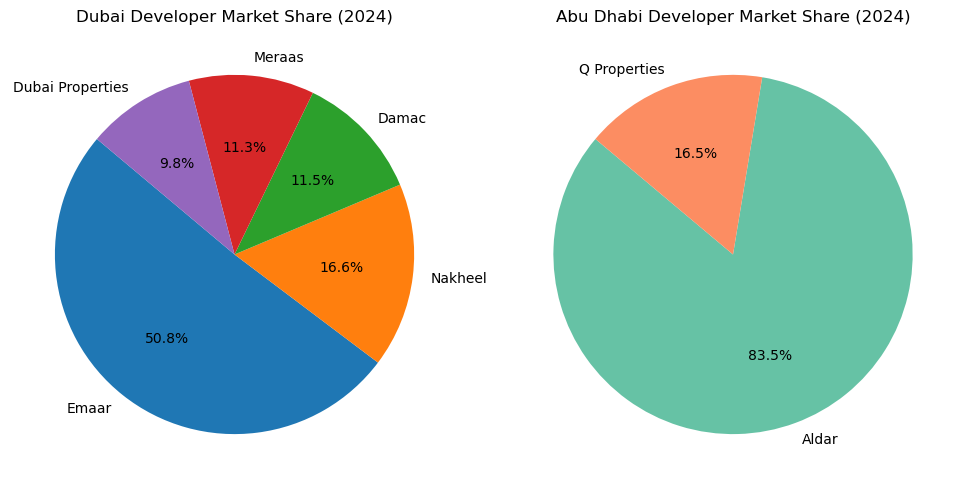

In [68]:
revenue_2024_dubai = {
    'Emaar': 27500,
    'Nakheel': 9000,
    'Damac': 6200,
    'Meraas': 6100,
    'Dubai Properties': 5300
}

revenue_2024_abudhabi = {
    'Aldar': 15700,
    'Q Properties': 3100
}

# Combining data for plotting
df_market_share_dubai = pd.Series(revenue_2024_dubai)
df_market_share_abudhabi = pd.Series(revenue_2024_abudhabi)

# Plotting pie chart for Dubai
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df_market_share_dubai.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Dubai Developer Market Share (2024)')
plt.ylabel('')

# Plotting pie chart for Abu Dhabi
plt.subplot(1, 2, 2)
df_market_share_abudhabi.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Abu Dhabi Developer Market Share (2024)')
plt.ylabel('')

plt.tight_layout()
plt.show()

4. COVID Impact

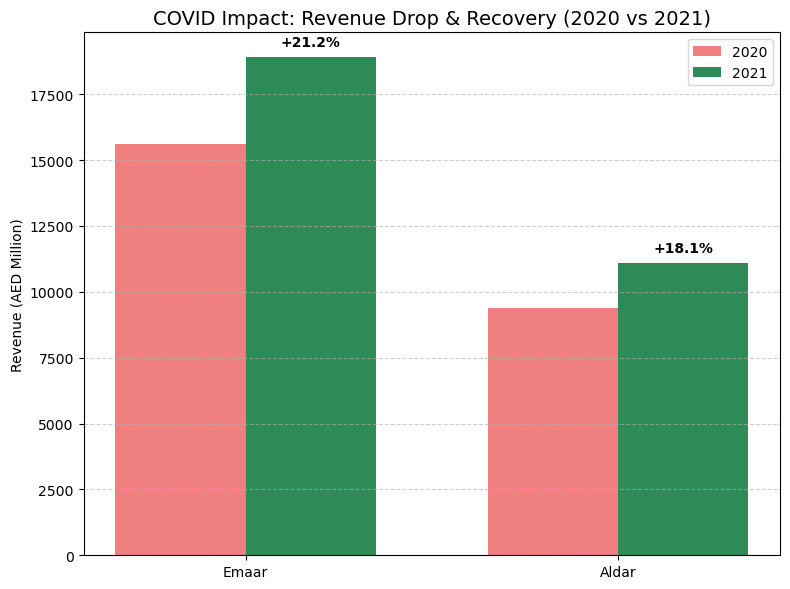

,Developer,2020 Revenue,2021 Revenue,% Change
0,Emaar,15600,18900,21.153846
1,Aldar,9400,11100,18.085106


In [70]:
covid_focus_data = {
    'Developer': ['Emaar', 'Aldar'],
    '2020 Revenue': [15600, 9400],
    '2021 Revenue': [18900, 11100]
}
df_covid_focus = pd.DataFrame(covid_focus_data)

# Calculating % recovery
df_covid_focus['% Change'] = ((df_covid_focus['2021 Revenue'] - df_covid_focus['2020 Revenue']) /
                              df_covid_focus['2020 Revenue']) * 100

# Plotting bar chart
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.35
x = np.arange(len(df_covid_focus['Developer']))

bar1 = ax.bar(x - width/2, df_covid_focus['2020 Revenue'], width, label='2020', color='lightcoral')
bar2 = ax.bar(x + width/2, df_covid_focus['2021 Revenue'], width, label='2021', color='seagreen')

# Annotations
for i, (bar_2020, bar_2021, pct) in enumerate(zip(bar1, bar2, df_covid_focus['% Change'])):
    ax.text(bar_2021.get_x() + bar_2021.get_width()/2, bar_2021.get_height() + 300,
            f"+{pct:.1f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel('Revenue (AED Million)')
ax.set_title('COVID Impact: Revenue Drop & Recovery (2020 vs 2021)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_covid_focus['Developer'])
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("/mnt/data/COVID_Impact_Emaar_Aldar.png")
plt.show()

# Display summary table again
df_covid_focus[['Developer', '2020 Revenue', '2021 Revenue', '% Change']]